# LAB | Hyperparameter Tuning

**Load the data**

Finally step in order to maximize the performance on your Spaceship Titanic model.

The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

So far we've been training and evaluating models with default values for hyperparameters.

Today we will perform the same feature engineering as before, and then compare the best working models you got so far, but now fine tuning it's hyperparameters.

In [19]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Now perform the same as before:
- Feature Scaling
- Feature Selection


In [4]:
spaceship.shape

spaceship.dtypes

spaceship.isna().sum()

spaceship.dropna(inplace = True)

spaceship["Cabin"] = spaceship["Cabin"].str.split("/").apply(lambda x: x[0])
spaceship["Cabin"].value_counts()

spaceship = spaceship.drop(columns = ['PassengerId','Name'])

In [6]:
cat_f = spaceship[["HomePlanet","CryoSleep","Cabin","Destination","VIP"]]
num_f = spaceship.drop(columns=["HomePlanet","CryoSleep","Cabin","Destination","VIP"])

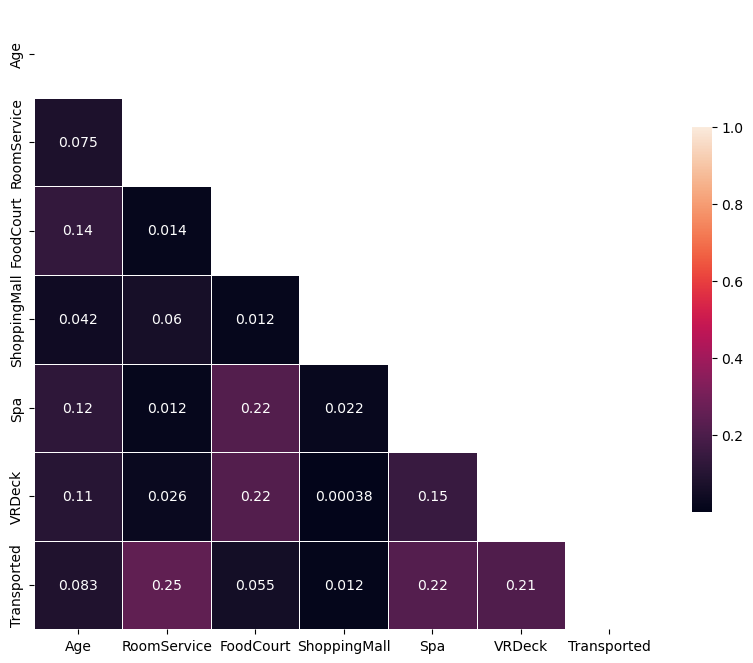

In [9]:
corr=np.abs(num_f.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [10]:
num_f.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')

In [12]:
num_f = num_f.drop(columns=['Transported','ShoppingMall'])

In [14]:
num_f

,Age,RoomService,FoodCourt,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,549.0,44.0
2,58.0,43.0,3576.0,6715.0,49.0
3,33.0,0.0,1283.0,3329.0,193.0
4,16.0,303.0,70.0,565.0,2.0
...,...,...,...,...,...
8688,41.0,0.0,6819.0,1643.0,74.0
8689,18.0,0.0,0.0,0.0,0.0
8690,26.0,0.0,0.0,1.0,0.0
8691,32.0,0.0,1049.0,353.0,3235.0


In [15]:
cat_f_encoded = pd.get_dummies(cat_f, drop_first = True)
cat_f_encoded

,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,1,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,1,1
3,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,0,0,0,0,0,0,0,0,0,1
8689,0,0,1,0,0,0,0,0,1,0,1,0,0
8690,0,0,0,0,0,0,0,0,1,0,0,1,0
8691,1,0,0,0,0,0,1,0,0,0,0,0,0


In [16]:
features = pd.concat([num_f, cat_f_encoded] ,axis = 1)
target = spaceship['Transported']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [20]:
normalizer = MinMaxScaler()
normalizer.fit(x_train)
x_train_norm = normalizer.transform(x_train)
x_test_norm = normalizer.transform(x_test)

In [21]:
x_train_norm = pd.DataFrame(x_train_norm, columns = x_train.columns)
x_test_norm = pd.DataFrame(x_test_norm, columns = x_test.columns)

- Now let's use the best model we got so far in order to see how it can improve when we fine tune it's hyperparameters.

In [22]:
forest = RandomForestClassifier(n_estimators=100,
                             max_depth=20)

In [23]:
forest.fit(x_train_norm, y_train)

RandomForestClassifier(max_depth=20)

- Evaluate your model

In [25]:
print("accuracy", forest.score(x_test_norm, y_test))

accuracy 0.7829046898638427


**Grid/Random Search**

For this lab we will use Grid Search.

- Define hyperparameters to fine tune.

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
grid = {'n_estimators': [50, 100, 200,500],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]}

- Run Grid Search

In [28]:
model = GridSearchCV(estimator = forest, param_grid = grid, cv=5)

In [30]:
model.fit(x_train_norm, y_train)

C:\Users\ramya\anaconda3\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=20),
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 500]})

- Evaluate your model

In [31]:
model.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

In [32]:
best_model = model.best_estimator_
best_model

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200)

In [35]:
print("R2 score", model.score(x_test_norm, y_test))

R2 score 0.7844175491679274
